In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
from ram.analysis.run_manager import RunManagerGCP
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

### List all Strategies available in Storage

In [3]:
RunManagerGCP.get_strategies()

[u'LongPeadStrategy']

### List all Runs for specific Strategy in Storage

In [4]:
RunManagerGCP.get_run_names('LongPeadStrategy')

,Run,RunDate,Completed,Description,Starred
0,run_0025,2017-08-09,True,Version 65,
1,run_0031,2017-08-15,True,Market vars and stats,
2,run_0034,2017-08-16,True,Constructor2 first run,
3,run_0038,2017-08-18,False,Top 800 fixed bug in market data,
4,run_0041,2017-08-21,True,Trees have log2 max features,
5,run_0050,2017-08-28,False,500 estimators,*
6,run_0053,2017-08-29,False,Fewer signal hyperparameters to get full run w...,
7,run_0070,2017-09-14,False,"new response, fewer models, constrained market",
8,run_0072,2017-09-15,False,rerun of sector 20,
9,run_0073,2017-09-15,False,rerun of sector 25,


In [9]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0110')

In [10]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,352,0.812034,0.093551
1,drop_accounting,True,352,0.779806,0.088336
2,drop_extremes,True,704,0.795920,0.090943
3,drop_ibes,False,352,0.829720,0.095040
4,drop_ibes,True,352,0.762120,0.086847
5,drop_market_variables,constrained,704,0.795920,0.090943
6,drop_starmine,False,352,0.809974,0.092375
7,drop_starmine,True,352,0.781866,0.089512
8,model_params,"{u'n_estimators': 100, u'max_features': 0.8, u...",352,0.806252,0.091756
9,model_params,"{u'n_estimators': 30, u'max_features': 0.6, u'...",352,0.785588,0.090131


In [ ]:
drop_params = [('drop_ibes', True)]

runs = [
    'run_0106', 'run_0109', 'run_0110',
    'run_0107', 'run_0112', 'run_0114',
    'run_0108', 'run_0113', 'run_0115',
]

comb = CombinationSearch(write_flag=True, gcp_implementation=True)

for run in runs:
    run01 = RunManagerGCP('LongPeadStrategy', run,
                          test_periods=0,
                          drop_params=drop_params)

    comb.add_run(run01)

comb.start(1)

In [5]:
# Make sector specific run containers
drop_params = [('drop_ibes', False), ('drop_accounting', True)]
test_periods = 0

runs_sector_20 = []
runs_sector_20.append(RunManagerGCP('LongPeadStrategy', 'run_0106', test_periods=test_periods, start_year=2009, drop_params=drop_params))
runs_sector_20.append(RunManagerGCP('LongPeadStrategy', 'run_0109', test_periods=test_periods, start_year=2009))
runs_sector_20.append(RunManagerGCP('LongPeadStrategy', 'run_0110', test_periods=test_periods, start_year=2009))

In [6]:
runs_sector_25 = []
runs_sector_25.append(RunManagerGCP('LongPeadStrategy', 'run_0107', test_periods=test_periods, start_year=2009, drop_params=drop_params))
runs_sector_25.append(RunManagerGCP('LongPeadStrategy', 'run_0112', test_periods=test_periods, start_year=2009))
runs_sector_25.append(RunManagerGCP('LongPeadStrategy', 'run_0114', test_periods=test_periods, start_year=2009))

In [7]:
runs_sector_45 = []
runs_sector_45.append(RunManagerGCP('LongPeadStrategy', 'run_0108', test_periods=test_periods, start_year=2009, drop_params=drop_params))
runs_sector_45.append(RunManagerGCP('LongPeadStrategy', 'run_0113', test_periods=test_periods, start_year=2009))
runs_sector_45.append(RunManagerGCP('LongPeadStrategy', 'run_0115', test_periods=test_periods, start_year=2009))

In [65]:
def make_comb_search(run_list):
    comb = CombinationSearch()
    for run in run_list:
        comb.add_run(run)
    return comb

In [66]:
comb20 = make_comb_search(runs_sector_20)
comb25 = make_comb_search(runs_sector_25)
comb45 = make_comb_search(runs_sector_45)

In [67]:
# Optimized based on Returns
comb20.start(10, criteria='sharpe')
comb25.start(10, criteria='sharpe')
comb45.start(10, criteria='sharpe')

100%|██████████| 10/10 [03:23<00:00, 20.12s/it]


In [68]:
x1 = comb20.best_results_rets.iloc[:, 0].dropna()
x2 = comb25.best_results_rets.iloc[:, 0].dropna()
x3 = comb45.best_results_rets.iloc[:, 0].dropna()
xX = ((x1+x2+x3)/3.)

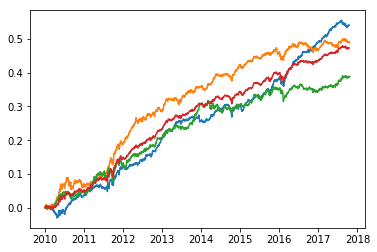

In [69]:
plt.figure()
plt.plot(x1.cumsum())
plt.plot(x2.cumsum())
plt.plot(x3.cumsum())
plt.plot(xX.cumsum())
plt.show()

In [76]:
rets1 = rollup_returns(xX.to_frame())
rets1['year'] = rets1.sum(axis=1)
rets1

Qtr,1,2,3,4,year
Year,,,,,
2010,0.001508,0.026507,0.017717,0.006539,0.052271
2011,0.020863,0.014379,0.005321,0.055047,0.095611
2012,0.025390,0.014899,0.017121,0.028233,0.085643
2013,0.025204,0.011629,0.016460,0.020811,0.074103
2014,0.003515,0.011108,-0.001307,0.022422,0.035738
2015,0.011640,0.011018,0.012653,0.021199,0.056510
2016,0.009832,0.019438,0.001893,0.003794,0.034958
2017,0.018450,0.008332,0.009189,0.002126,0.038098


In [71]:
comb20b = make_comb_search(runs_sector_20)
comb25b = make_comb_search(runs_sector_25)
comb45b = make_comb_search(runs_sector_45)

# Optimized based on Returns
comb20b.start(10, criteria='mean')
comb25b.start(10, criteria='mean')
comb45b.start(10, criteria='mean')

100%|██████████| 10/10 [03:04<00:00, 20.07s/it]


In [72]:
x1b = comb20b.best_results_rets.iloc[:, 0].dropna()
x2b = comb25b.best_results_rets.iloc[:, 0].dropna()
x3b = comb45b.best_results_rets.iloc[:, 0].dropna()
xXb = ((x1b+x2b+x3b)/3.)

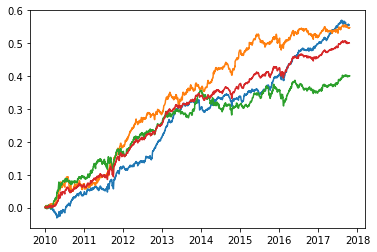

In [73]:
plt.figure()
plt.plot(x1b.cumsum())
plt.plot(x2b.cumsum())
plt.plot(x3b.cumsum())
plt.plot(xXb.cumsum())
plt.show()

In [77]:
rets2 = rollup_returns(xXb.to_frame())
rets2['year'] = rets2.sum(axis=1)
rets2

Qtr,1,2,3,4,year
Year,,,,,
2010,0.005469,0.037275,0.015122,0.010843,0.068709
2011,0.016983,0.012434,-0.001058,0.063240,0.091599
2012,0.028398,0.020765,0.012437,0.031973,0.093573
2013,0.038794,0.015874,0.014819,0.016851,0.086338
2014,-0.003068,0.013815,-0.004946,0.029911,0.035712
2015,0.013736,0.009080,0.002245,0.024465,0.049526
2016,0.009509,0.026628,-0.003991,-0.000920,0.031225
2017,0.017154,0.013485,0.012836,0.000395,0.043870


In [108]:
stats_mean = get_stats(xXb.dropna().to_frame())
stats_mean.columns = ['Comb - Mean']
stats_sharpe = get_stats(xX.dropna().to_frame())
stats_sharpe.columns = ['Comb - Sharpe']
stats_all = get_stats(XA.dropna().to_frame())
stats_all.columns = ['All - Sharpe']
stats_all2 = get_stats(XAb.dropna().to_frame())
stats_all2.columns = ['All - Mean']

stats_sharpe.join(stats_mean).join(stats_all).join(stats_all2)

,Comb - Sharpe,Comb - Mean,All - Sharpe,All - Mean
Total,0.4729,0.5006,0.5691,0.5492
Mean,0.0002,0.0003,0.0003,0.0003
Std,0.0016,0.0018,0.0017,0.0023
Skew,0.6824,0.3916,0.0862,0.1914
Kurt,7.1000,4.8200,3.5400,5.4500
Sharpe,2.4162,2.2111,2.6351,1.9362
Sortino,4.5572,4.0856,4.8161,3.4855
MinRet,-0.0082,-0.0094,-0.0108,-0.0161
WinP,0.5757,0.5625,0.5796,0.5471
DD%,-0.0305,-0.0353,-0.0286,-0.0772


In [8]:
combAll = CombinationSearch()
for run in runs_sector_20:
    combAll.add_run(run)
for run in runs_sector_25:
    combAll.add_run(run)
for run in runs_sector_45:
    combAll.add_run(run)

In [9]:
combAll.start(10, criteria='sharpe')

100%|██████████| 10/10 [02:13<00:00, 14.57s/it]


In [12]:
rets = combAll.best_results_rets.dropna()

In [41]:
rets.to_csv('/home/mitch/statarbrets.csv')

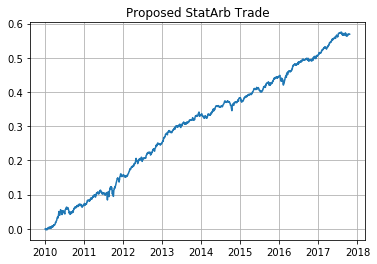

In [16]:
plt.figure()
plt.plot(rets.iloc[:, 0].cumsum())
plt.grid()
plt.title('Proposed StatArb Trade')
plt.show()

In [18]:
rets2 = rollup_returns(rets)
rets2['Year'] = rets2.sum(axis=1)

In [21]:
rets2.round(4)

Qtr,1,2,3,4,Year
Year,,,,,
2010,0.0108,0.0347,0.0140,0.0095,0.0690
2011,0.0258,0.0104,-0.0075,0.0595,0.0881
2012,0.0240,0.0188,0.0234,0.0281,0.0944
2013,0.0301,0.0217,0.0140,0.0159,0.0818
2014,0.0024,0.0206,0.0073,0.0180,0.0483
2015,0.0108,0.0125,0.0173,0.0253,0.0659
2016,0.0118,0.0278,0.0041,0.0161,0.0598
2017,0.0260,0.0299,0.0030,0.0028,0.0617


In [34]:
get_stats(rets.iloc[:, 0].to_frame())

,0
Total,0.5691
Mean,0.0003
Std,0.0017
Skew,0.0862
Kurt,3.5400
Sharpe,2.6351
Sortino,4.8161
MinRet,-0.0108
WinP,0.5796
DD%,-0.0286


In [100]:
combAll2 = CombinationSearch()
for run in runs_sector_20:
    combAll2.add_run(run)
for run in runs_sector_25:
    combAll2.add_run(run)
for run in runs_sector_45:
    combAll2.add_run(run)

In [101]:
combAll2.start(10, criteria='mean')

100%|██████████| 10/10 [01:56<00:00, 11.80s/it]


In [102]:
XA = combAll.best_results_rets.iloc[:, 0].dropna()
XAb = combAll2.best_results_rets.iloc[:, 0].dropna()

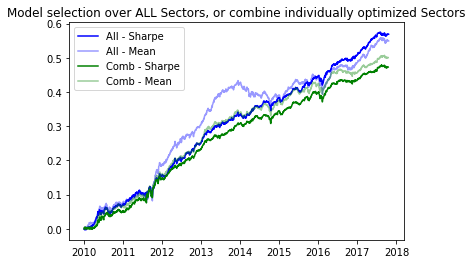

In [106]:
plt.figure()
plt.plot(XA.cumsum(), 'b', label='All - Sharpe')
plt.plot(XAb.cumsum(), 'b', alpha=0.4, label='All - Mean')
plt.plot(xX.cumsum(), 'g', label='Comb - Sharpe')
plt.plot(xXb.cumsum(), 'g', alpha=0.4, label='Comb - Mean')
plt.title('Model selection over ALL Sectors, or combine individually optimized Sectors')
plt.legend(loc=2)
plt.show()


In [96]:
rollup_returns(XA.to_frame()).sum(axis=1)

Year
2010    0.069005
2011    0.088135
2012    0.094357
2013    0.081785
2014    0.048336
2015    0.065931
2016    0.059829
2017    0.061735
dtype: float64

In [97]:
get_stats(XA.to_frame())

,0
Total,0.5691
Mean,0.0003
Std,0.0017
Skew,0.0862
Kurt,3.5400
Sharpe,2.6351
Sortino,4.8161
MinRet,-0.0108
WinP,0.5796
DD%,-0.0286


In [118]:
df = pd.DataFrame({
    'Comb - Sharpe': rollup_returns(xX.to_frame()).sum(axis=1),
    'Comb - Mean': rollup_returns(xXb.to_frame()).sum(axis=1),
    'All - Mean': rollup_returns(XAb.to_frame()).sum(axis=1),
    'All - Sharpe': rollup_returns(XA.to_frame()).sum(axis=1)
})
df[['Comb - Sharpe', 'Comb - Mean', 'All - Sharpe', 'All - Mean']]

,Comb - Sharpe,Comb - Mean,All - Sharpe,All - Mean
Year,,,,
2010,0.052271,0.068709,0.069005,0.074584
2011,0.095611,0.091599,0.088135,0.112721
2012,0.085643,0.093573,0.094357,0.118738
2013,0.074103,0.086338,0.081785,0.121326
2014,0.035738,0.035712,0.048336,-0.037420
2015,0.056510,0.049526,0.065931,0.054483
2016,0.034958,0.031225,0.059829,0.040891
2017,0.038098,0.043870,0.061735,0.063881


In [4]:
import time
from tqdm import tqdm

In [6]:
for i in tqdm(range(10)):
    time.sleep(3)

100%|██████████| 10/10 [00:30<00:00,  3.00s/it]


In [123]:
def make_comb_cycle(ind):
    combCycle = CombinationSearch()
    combCycle.add_run(runs_sector_20[ind])
    combCycle.add_run(runs_sector_25[ind])
    combCycle.add_run(runs_sector_45[ind])
    return combCycle

In [124]:
combC0 = make_comb_cycle(0)
combC1 = make_comb_cycle(1)
combC2 = make_comb_cycle(2)

In [147]:
combC0.start(10, criteria='sharpe')
combC1.start(10, criteria='sharpe')
combC2.start(10, criteria='sharpe')

100%|██████████| 10/10 [03:43<00:00, 21.34s/it]


In [151]:
y1 = combC0.best_results_rets.iloc[:, 0].dropna()
y2 = combC1.best_results_rets.iloc[:, 0].dropna()
y3 = combC2.best_results_rets.iloc[:, 0].dropna()
Y = (y1 + y2 + y3) / 3.

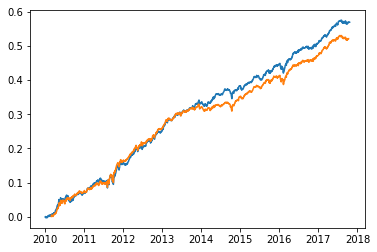

In [153]:
plt.figure()
plt.plot(XA.cumsum())
plt.plot(Y.cumsum())
plt.show()

In [57]:
runAll = RunManagerGCP('LongPeadStrategy', 'run_0111', test_periods=7, start_year=2009)

In [58]:
runAll.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,True,176,0.354323,0.071702
1,drop_extremes,True,176,0.354323,0.071702
2,drop_ibes,True,176,0.354323,0.071702
3,drop_market_variables,constrained,176,0.354323,0.071702
4,drop_starmine,False,88,0.379653,0.077106
5,drop_starmine,True,88,0.328992,0.066299
6,model_params,"{u'n_estimators': 100, u'max_features': 0.8, u...",88,0.366354,0.073053
7,model_params,"{u'n_estimators': 30, u'max_features': 0.6, u'...",88,0.342292,0.070351
8,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",16,0.391178,0.072252
9,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",16,0.423105,0.074378


In [59]:
combAll = CombinationSearch()
combAll.add_run(runAll)
combAll.start(10, criteria='sharpe')


  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [02:08<00:00, 13.73s/it]


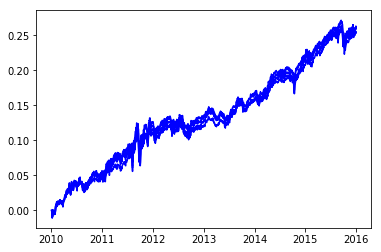

In [61]:
rets = combAll.best_results_rets.dropna()
plt.figure()
plt.plot(rets.cumsum(), 'b')
plt.show()

In [59]:
rollup_returns(rets).sum(axis=1)

Year
2010    0.056431
2011    0.053889
2012    0.009886
2013    0.036710
2014    0.051097
2015    0.052844
dtype: float64

In [60]:
rollup_returns(x.to_frame()).sum(axis=1)

Year
2010    0.063548
2011    0.101882
2012    0.081741
2013    0.059150
2014    0.038743
2015    0.076399
2016   -0.007899
dtype: float64

In [72]:
run3 = RunManagerGCP('LongPeadStrategy', 'run_0110', test_periods=7, start_year=2009)

In [73]:
run3.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,352,0.400846,0.084712
1,drop_accounting,True,352,0.372459,0.077857
2,drop_extremes,True,704,0.386652,0.081285
3,drop_ibes,False,352,0.413151,0.087142
4,drop_ibes,True,352,0.360154,0.075427
5,drop_market_variables,constrained,704,0.386652,0.081285
6,drop_starmine,False,352,0.405183,0.085428
7,drop_starmine,True,352,0.368121,0.077141
8,model_params,"{u'n_estimators': 100, u'max_features': 0.8, u...",352,0.392748,0.082027
9,model_params,"{u'n_estimators': 30, u'max_features': 0.6, u'...",352,0.380557,0.080543


In [61]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0106', test_periods=7, start_year=2009)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0109', test_periods=7, start_year=2009)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0110', test_periods=7, start_year=2009)


Jan/Apr/Jul/Oct



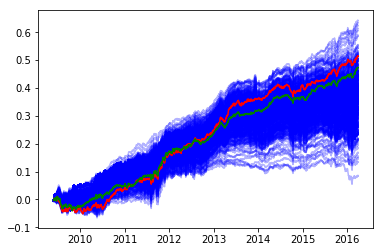

In [62]:
print('\nJan/Apr/Jul/Oct\n')
run1.plot_results()


Feb/May/Aug/Nov



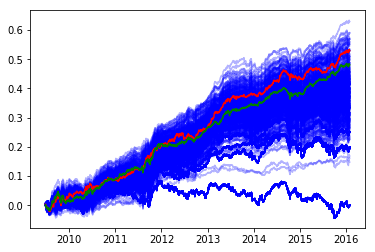

In [64]:
print('\nFeb/May/Aug/Nov\n')
run2.plot_results()


Mar/Jun/Sep/Dec



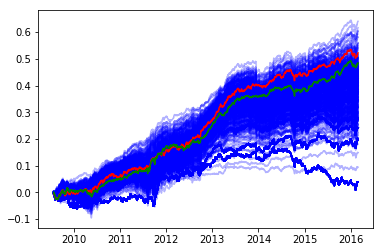

In [65]:
print('\nMar/Jun/Sep/Dec\n')
run3.plot_results()

In [66]:
# These runs are not correctly labelled
comb1 = CombinationSearch()
comb1.add_run(run1)
comb1.start(10, criteria='sharpe')

100%|██████████| 10/10 [01:27<00:00,  8.83s/it]


In [67]:
comb2 = CombinationSearch()
comb2.add_run(run2)
comb2.start(10, criteria='sharpe')

comb3 = CombinationSearch()
comb3.add_run(run3)
comb3.start(10, criteria='sharpe')

100%|██████████| 10/10 [02:55<00:00, 16.64s/it]



Best in class for Sector 20


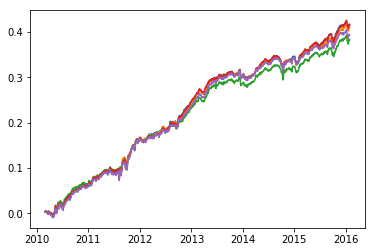

In [68]:
x1 = comb1.best_results_rets
x2 = comb2.best_results_rets
x3 = comb3.best_results_rets

x = ((x1 + x2 + x3) / 3.).dropna()

print('\nBest in class for Sector 20')
plt.figure()
plt.plot(x.cumsum())
plt.show()

In [71]:
rets = rollup_returns(pd.DataFrame(x))
rets['Year'] = rets.sum(axis=1)
print rets

Qtr          1         2         3         4      Year
Year                                                  
2010  0.000817  0.009992  0.041096  0.011644  0.063548
2011  0.021021  0.008435  0.007191  0.065235  0.101882
2012  0.006824  0.014146  0.013515  0.047256  0.081741
2013  0.015925  0.035223  0.011748 -0.003745  0.059150
2014  0.005060  0.019292 -0.003680  0.018070  0.038743
2015  0.015067  0.009119  0.015152  0.037062  0.076399
2016 -0.007899       NaN       NaN       NaN -0.007899


In [70]:
get_stats(x.dropna().to_frame())

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [39]:
get_stats(x2.dropna().to_frame())

,0
Total,0.4084
Mean,0.0003
Std,0.0019
Skew,0.2198
Kurt,3.4900
Sharpe,2.2729
Sortino,4.1973
MinRet,-0.0116
WinP,0.5391
DD%,-0.0328


In [20]:
rets1 = run1.returns.iloc[:, [10]]
rets1['month'] = [x.month for x in rets1.index]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
rets1.groupby('month')['10'].mean()

month
1     0.000370
2     0.000378
3     0.000257
4     0.000602
5     0.000327
6     0.000360
7     0.000456
8     0.000350
9    -0.000311
10    0.000294
11    0.000560
12    0.000227
Name: 10, dtype: float64

In [9]:
params2 = run2.analyze_parameters()
params2

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,48,0.220450,0.062865
1,drop_extremes,True,48,0.220450,0.062865
2,drop_market_variables,True,48,0.220450,0.062865
3,group_variable,Liquidity,16,0.224166,0.055017
4,group_variable,MarketCap,16,0.231560,0.059820
5,group_variable,Sector,16,0.205624,0.073759
6,logistic_spread,0.1,24,0.225718,0.062959
7,logistic_spread,2,24,0.215182,0.062771
8,max_features,0.8,48,0.220450,0.062865
9,min_samples_leaf,45,48,0.220450,0.062865


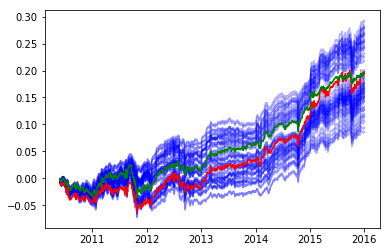

In [10]:
run2.plot_results()

In [131]:
x = run1.analyze_returns()

In [132]:
x[1].sum(axis=1)

year
2010    0.016867
2011    0.019937
2012    0.014495
2013    0.031097
2014    0.060332
2015    0.089374
dtype: float64

In [91]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0103', test_periods=7, start_year=2010)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0104', test_periods=7, start_year=2010)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0105', test_periods=7, start_year=2010)

In [59]:
params1 = run1.analyze_parameters()
params2 = run2.analyze_parameters()
params3 = run3.analyze_parameters()

In [62]:
params3

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,distance_rank_group,1,28,0.295927,0.069102
1,distance_rank_group,2,28,0.271782,0.062787
2,drop_accounting,False,56,0.283855,0.065944
3,drop_extract_alpha,True,56,0.283855,0.065944
4,drop_extremes,True,56,0.283855,0.065944
5,drop_market_variables,constrained,56,0.283855,0.065944
6,drop_starmine,True,56,0.283855,0.065944
7,model_params,"{u'n_estimators': 100, u'max_features': 0.6, u...",56,0.283855,0.065944
8,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",4,0.289717,0.065538
9,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",4,0.293453,0.058764


In [70]:
print params3.Val[18]
print params3.Val[20]

{u'type': u'tree_model_long', u'pair_max_offsets': 3, u'concentration_filter': False, u'signal_thresh_perc': 50}
{u'type': u'tree_model_long', u'pair_max_offsets': 3, u'concentration_filter': True, u'signal_thresh_perc': 50}


In [57]:
print ('\nSector 45')
params3.iloc[[4, 5]]


Sector 45


,Param,Val,Count,MeanTotalRet,MeanSharpe
4,drop_ibes,False,12,0.331806,0.075134
5,drop_ibes,True,12,0.366156,0.083231


In [49]:
params1.Val.iloc[20]

"{u'type': u'tree_model_long', u'pair_max_offsets': 3, u'concentration_filter': True, u'signal_thresh_perc': 70}"

In [152]:
stats, rets1 = run1.analyze_returns(drop_paramsT)
rets1['total'] = rets1.sum(axis=1)

In [157]:
(rets + rets1) / 2

qtr,1,2,3,4,total
year,,,,,
2010,NaN,0.002530,0.036511,-0.001302,0.037739
2011,0.015153,-0.002028,0.014808,0.064680,0.092613
2012,-0.001418,0.004800,0.010436,0.037280,0.051098
2013,0.007462,0.015633,0.010114,-0.000357,0.032852
2014,0.003057,0.021196,-0.013480,-0.004140,0.006634
2015,0.007309,0.004598,-0.008368,0.024877,0.028415


In [156]:
rets1

qtr,1,2,3,4,total
year,,,,,
2010,NaN,-0.003464,0.052477,0.004030,0.053042
2011,0.008650,-0.012226,0.001421,0.071984,0.069828
2012,-0.001912,0.008354,0.012015,0.043885,0.062342
2013,0.020013,0.027971,0.006856,-0.007907,0.046933
2014,0.007979,0.016151,-0.017312,0.004852,0.011670
2015,0.010134,-0.001186,-0.018812,0.014339,0.004476


In [75]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0109', test_periods=2, start_year=2010)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0110', test_periods=7, start_year=2010)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0111', test_periods=7, start_year=2010)

In [76]:
params = run1.analyze_parameters()
params

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,26,0.250454,0.065920
1,drop_extract_alpha,True,26,0.250454,0.065920
2,drop_extremes,True,26,0.250454,0.065920
3,drop_market_variables,constrained,26,0.250454,0.065920
4,drop_starmine,True,26,0.250454,0.065920
5,model_params,"{u'n_estimators': 100, u'max_features': 0.6, u...",26,0.250454,0.065920
6,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",2,0.255682,0.048053
7,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",2,0.285614,0.050007
8,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",2,0.272354,0.068303
9,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",2,0.304350,0.069253


In [80]:
# Sector 20
#drop_params = [p for k, p in zip(params.Param, params.Val) if (p.find("'n_per_side': 1") == -1) & (k == 'params')]
drop_params = [p for k, p in zip(params.Param, params.Val) if (p.find("'pair_max_offsets': 3") == -1) & (k == 'params')]
drop_params = [('params', p) for p in drop_params]

In [82]:
run1.analyze_parameters(drop_params)

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,8,0.258038,0.078077
1,drop_extract_alpha,True,8,0.258038,0.078077
2,drop_extremes,True,8,0.258038,0.078077
3,drop_market_variables,constrained,8,0.258038,0.078077
4,drop_starmine,True,8,0.258038,0.078077
5,model_params,"{u'n_estimators': 100, u'max_features': 0.6, u...",8,0.258038,0.078077
6,params,"{u'pair_max_offsets': 3, u'filter_offset_signa...",2,0.306464,0.089002
7,params,"{u'pair_max_offsets': 3, u'filter_offset_signa...",2,0.287776,0.082366
8,params,"{u'pair_max_offsets': 3, u'type': u'tree_model'}",2,0.255566,0.083878
9,params,"{u'pair_max_offsets': 3, u'type': u'zscore_mod...",2,0.182347,0.057064


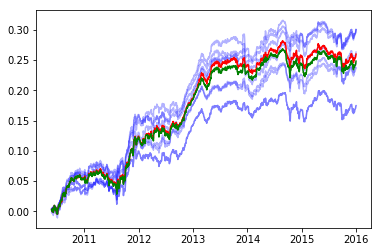

In [83]:
run1.plot_results(drop_params)

In [84]:
stats, rets1 = run1.analyze_returns(drop_params)
rets1['total'] = rets1.sum(axis=1)

In [85]:
rets1

qtr,1,2,3,4,total
year,,,,,
2010,NaN,-0.003464,0.052477,0.004030,0.053042
2011,0.008650,-0.012226,0.001421,0.071984,0.069828
2012,-0.001912,0.008354,0.012015,0.043885,0.062342
2013,0.020013,0.027971,0.006856,-0.007907,0.046933
2014,0.007979,0.016151,-0.017312,0.004852,0.011670
2015,0.010134,-0.001186,-0.018812,0.014339,0.004476


In [86]:
params = run2.analyze_parameters()
params

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,26,0.350104,0.082140
1,drop_extract_alpha,True,26,0.350104,0.082140
2,drop_extremes,True,26,0.350104,0.082140
3,drop_market_variables,constrained,26,0.350104,0.082140
4,drop_starmine,True,26,0.350104,0.082140
5,model_params,"{u'n_estimators': 100, u'max_features': 0.6, u...",26,0.350104,0.082140
6,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",2,0.418198,0.070943
7,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",2,0.461847,0.073564
8,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",2,0.400541,0.088534
9,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",2,0.515402,0.102164


In [87]:
# Sector 25
#drop_params = [p for k, p in zip(params.Param, params.Val) if (p.find("'n_per_side': 1") == -1) & (k == 'params')]
drop_params = [p for k, p in zip(params.Param, params.Val) if (p.find("'pair_max_offsets': 3") == -1) & (k == 'params')]
drop_params = [('params', p) for p in drop_params]

In [88]:
params = run2.analyze_parameters(drop_params)
params

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,8,0.312268,0.086207
1,drop_extract_alpha,True,8,0.312268,0.086207
2,drop_extremes,True,8,0.312268,0.086207
3,drop_market_variables,constrained,8,0.312268,0.086207
4,drop_starmine,True,8,0.312268,0.086207
5,model_params,"{u'n_estimators': 100, u'max_features': 0.6, u...",8,0.312268,0.086207
6,params,"{u'pair_max_offsets': 3, u'filter_offset_signa...",2,0.386499,0.101825
7,params,"{u'pair_max_offsets': 3, u'filter_offset_signa...",2,0.322036,0.083983
8,params,"{u'pair_max_offsets': 3, u'type': u'tree_model'}",2,0.305877,0.091555
9,params,"{u'pair_max_offsets': 3, u'type': u'zscore_mod...",2,0.234660,0.067465


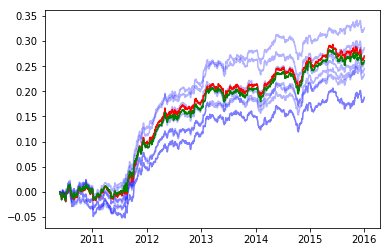

In [89]:
run2.plot_results(drop_params)

In [90]:
stats, rets2 = run2.analyze_returns(drop_params)
rets2['total'] = rets2.sum(axis=1)

In [91]:
rets2

qtr,1,2,3,4,total
year,,,,,
2010,NaN,-0.013716,0.019829,-0.001060,0.005053
2011,0.006548,-0.011314,0.035257,0.055997,0.086488
2012,0.041226,0.011779,0.010673,0.011716,0.075395
2013,0.034867,-0.008797,-0.000762,0.013224,0.038532
2014,0.004635,0.025464,-0.027819,0.050488,0.052769
2015,0.002761,0.006438,-0.004413,-0.001746,0.003039


In [92]:
params = run3.analyze_parameters()
params

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,26,0.331142,0.074790
1,drop_extract_alpha,True,26,0.331142,0.074790
2,drop_extremes,True,26,0.331142,0.074790
3,drop_market_variables,constrained,26,0.331142,0.074790
4,drop_starmine,True,26,0.331142,0.074790
5,model_params,"{u'n_estimators': 100, u'max_features': 0.6, u...",26,0.331142,0.074790
6,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",2,0.523318,0.089728
7,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",2,0.551381,0.087644
8,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",2,0.311731,0.071873
9,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",2,0.296102,0.060094


In [93]:
# Sector 45
#drop_params = [p for k, p in zip(params.Param, params.Val) if (p.find("'n_per_side': 1") == -1) & (k == 'params')]
drop_params = [p for k, p in zip(params.Param, params.Val) if (p.find("'pair_max_offsets': 3") == -1) & (k == 'params')]
drop_params = [('params', p) for p in drop_params]

In [94]:
stats, rets3 = run3.analyze_returns(drop_params)
rets3['total'] = rets3.sum(axis=1)

In [95]:
(rets2 + rets3) / 2

qtr,1,2,3,4,total
year,,,,,
2010,NaN,-0.005543,0.007207,0.005792,0.007457
2011,0.010768,0.001983,0.003775,0.061504,0.078029
2012,0.026453,0.010503,0.008237,0.019007,0.064200
2013,0.031322,-0.003302,-0.002898,0.017086,0.042208
2014,-0.001958,0.009134,-0.021416,0.041135,0.026894
2015,0.010141,0.010083,-0.002285,0.014219,0.032157


In [66]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0109', test_periods=2, start_year=2010)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0110', test_periods=7, start_year=2010)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0111', test_periods=7, start_year=2010)

In [68]:
params = run1.analyze_parameters()

In [70]:
params

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,26,0.250454,0.065920
1,drop_extract_alpha,True,26,0.250454,0.065920
2,drop_extremes,True,26,0.250454,0.065920
3,drop_market_variables,constrained,26,0.250454,0.065920
4,drop_starmine,True,26,0.250454,0.065920
5,model_params,"{u'n_estimators': 100, u'max_features': 0.6, u...",26,0.250454,0.065920
6,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",2,0.255682,0.048053
7,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",2,0.285614,0.050007
8,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",2,0.272354,0.068303
9,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",2,0.304350,0.069253


In [69]:
inds = np.where(params.Param == 'params')[0]

for i in inds:
    print(i, params.Val.iloc[i])

(6, "{u'n_per_side': 1, u'type': u'zscore_model', u'z_thresh': 0.8}")
(7, "{u'n_per_side': 1, u'type': u'zscore_model', u'z_thresh': 1.2}")
(8, "{u'n_per_side': 3, u'type': u'zscore_model', u'z_thresh': 0.8}")
(9, "{u'n_per_side': 3, u'type': u'zscore_model', u'z_thresh': 1.2}")
(10, "{u'pair_max_offsets': 1, u'filter_offset_signal': None, u'type': u'tree_model_long'}")
(11, "{u'pair_max_offsets': 1, u'filter_offset_signal': None, u'type': u'tree_model_long_2'}")
(12, "{u'pair_max_offsets': 1, u'type': u'zscore_model_2'}")
(13, "{u'pair_max_offsets': 3, u'filter_offset_signal': None, u'type': u'tree_model_long'}")
(14, "{u'pair_max_offsets': 3, u'filter_offset_signal': None, u'type': u'tree_model_long_2'}")
(15, "{u'pair_max_offsets': 3, u'type': u'tree_model'}")
(16, "{u'pair_max_offsets': 3, u'type': u'zscore_model_2'}")
(17, "{u'pair_max_offsets': 5, u'type': u'zscore_model_2'}")
(18, "{u'pair_max_offsets': 7, u'type': u'tree_model'}")


In [35]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0086', test_periods=2, start_year=2010)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0087', test_periods=7, start_year=2010)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0088', test_periods=7, start_year=2010)

In [36]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,72,0.209999,0.057577
1,drop_extract_alpha,True,72,0.209999,0.057577
2,drop_extremes,True,72,0.209999,0.057577
3,drop_market_variables,False,36,0.146091,0.034735
4,drop_market_variables,constrained,36,0.273907,0.080419
5,drop_starmine,False,72,0.209999,0.057577
6,entry_threshold,0.001,36,0.209482,0.057361
7,entry_threshold,0.002,36,0.210516,0.057793
8,exit_threshold,-0.0005,36,0.210125,0.057733
9,exit_threshold,-0.001,36,0.209873,0.057421


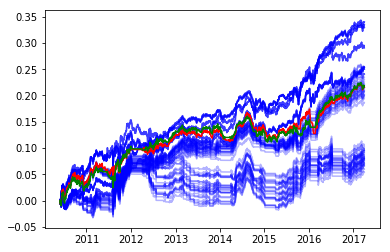

In [37]:
run1.plot_results()

## Analysis of a Single Run

In [29]:
# Original Pairs Filter
run1 = RunManagerGCP('LongPeadStrategy', 'run_0092', test_periods=2, start_year=2010)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0093', test_periods=7, start_year=2010)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0094', test_periods=7, start_year=2010)

In [32]:
run3.get_notes()

'No notes files'

In [9]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,48,0.296706,0.095261
1,drop_extract_alpha,True,48,0.296706,0.095261
2,drop_extremes,True,48,0.296706,0.095261
3,drop_market_variables,False,24,0.307406,0.095698
4,drop_market_variables,constrained,24,0.286006,0.094824
5,drop_starmine,False,48,0.296706,0.095261
6,filter_training,False,24,0.311954,0.099390
7,filter_training,True,24,0.281458,0.091132
8,logistic_spread,0.1,48,0.296706,0.095261
9,model_params,"{u'n_estimators': 100, u'max_features': 0.6, u...",48,0.296706,0.095261


In [25]:
# Pure pairs vs Trees
run1 = RunManagerGCP('LongPeadStrategy', 'run_0097', test_periods=2, start_year=2010)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0098', test_periods=7, start_year=2010)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0099', test_periods=7, start_year=2010)

In [28]:
run3.get_notes()

'No notes files'

In [13]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,88,0.265293,0.069040
1,drop_extract_alpha,True,88,0.265293,0.069040
2,drop_extremes,True,88,0.265293,0.069040
3,drop_market_variables,False,44,0.266089,0.068833
4,drop_market_variables,constrained,44,0.264496,0.069248
5,drop_starmine,False,88,0.265293,0.069040
6,model_params,"{u'n_estimators': 100, u'max_features': 0.6, u...",88,0.265293,0.069040
7,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",8,0.255682,0.048053
8,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",8,0.285614,0.050007
9,params,"{u'n_per_side': 2, u'type': u'zscore_model', u...",8,0.291593,0.061921


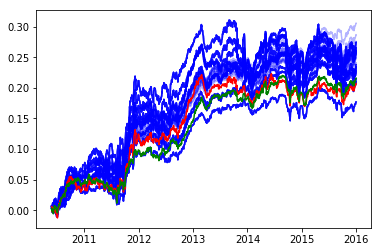

In [14]:
run1.plot_results()

In [34]:
run3.get_notes()

,DateTime,Note
0,2017-10-03T17:06:34,This was to test group_variable: Group; doesnt...


In [21]:
run3.add_note('This was to test group_variable: Group; doesnt look like much')

In [33]:
# GGroup sort
run1 = RunManagerGCP('LongPeadStrategy', 'run_0100', test_periods=7, start_year=2010)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0101', test_periods=7, start_year=2010)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0102', test_periods=7, start_year=2010)

In [17]:
run3.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,32,0.202012,0.062646
1,drop_extract_alpha,True,32,0.202012,0.062646
2,drop_extremes,True,32,0.202012,0.062646
3,drop_market_variables,constrained,32,0.202012,0.062646
4,drop_starmine,False,16,0.192639,0.059834
5,drop_starmine,True,16,0.211385,0.065457
6,group_variable,Group,8,0.212011,0.067598
7,group_variable,Liquidity,8,0.200094,0.061212
8,group_variable,MarketCap,8,0.191647,0.060440
9,group_variable,Sector,8,0.204296,0.061333


In [22]:
# Original Pairs Filter
run1 = RunManagerGCP('LongPeadStrategy', 'run_0106', test_periods=2, start_year=2010)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0107', test_periods=7, start_year=2010)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0108', test_periods=7, start_year=2010)

In [23]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,24,0.277042,0.072102
1,drop_extract_alpha,True,24,0.277042,0.072102
2,drop_extremes,True,24,0.277042,0.072102
3,drop_market_variables,constrained,24,0.277042,0.072102
4,drop_starmine,True,24,0.277042,0.072102
5,model_params,"{u'n_estimators': 100, u'max_features': 0.6, u...",24,0.277042,0.072102
6,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",2,0.255682,0.048053
7,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",2,0.285614,0.050007
8,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",2,0.272354,0.068303
9,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",2,0.304350,0.069253


In [10]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0103', test_periods=7, start_year=2010)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0104', test_periods=7, start_year=2010)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0105', test_periods=7, start_year=2010)

In [22]:
run3.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,72,0.310136,0.069486
1,drop_extract_alpha,True,72,0.310136,0.069486
2,drop_extremes,True,72,0.310136,0.069486
3,drop_market_variables,constrained,72,0.310136,0.069486
4,drop_starmine,False,36,0.322975,0.073331
5,drop_starmine,True,36,0.297298,0.065640
6,model_params,"{u'n_estimators': 100, u'max_features': 0.6, u...",72,0.310136,0.069486
7,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",8,0.523318,0.089728
8,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",8,0.551381,0.087644
9,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",8,0.311731,0.071873


In [24]:
out = run2.analyze_parameters()
for i in range(7, 16):
    print(out.Val[i])

{u'n_per_side': 1, u'type': u'zscore_model', u'z_thresh': 0.8}
{u'n_per_side': 1, u'type': u'zscore_model', u'z_thresh': 1.2}
{u'n_per_side': 3, u'type': u'zscore_model', u'z_thresh': 0.8}
{u'n_per_side': 3, u'type': u'zscore_model', u'z_thresh': 1.2}
{u'pair_max_offsets': 3, u'filter_offset_signal': 4, u'type': u'tree_model_long'}
{u'pair_max_offsets': 3, u'filter_offset_signal': 8, u'type': u'tree_model_long'}
{u'pair_max_offsets': 3, u'filter_offset_signal': None, u'type': u'tree_model_long'}
{u'pair_max_offsets': 3, u'type': u'tree_model'}
{u'pair_max_offsets': 7, u'type': u'tree_model'}


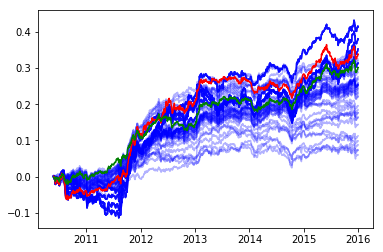

In [27]:
run2.plot_results()

In [25]:
stats, rets = run3.analyze_returns()

In [26]:
rets.sum(axis=1)

year
2010    0.010004
2011    0.112163
2012    0.061775
2013    0.070457
2014    0.026285
2015    0.051197
dtype: float64

## Combinations

In [90]:
RunManagerGCP.get_run_names('LongPeadStrategy')

,Run,RunDate,Completed,Description
0,run_0025,2017-08-09,True,Version 65
1,run_0031,2017-08-15,True,Market vars and stats
2,run_0034,2017-08-16,True,Constructor2 first run
3,run_0038,2017-08-18,False,Top 800 fixed bug in market data
4,run_0040,2017-08-21,False,Trees have no max features (log2 is in followi...
5,run_0041,2017-08-21,True,Trees have log2 max features
6,run_0046,2017-08-26,False,Abstract alpha
7,run_0050,2017-08-28,False,500 estimators
8,run_0053,2017-08-29,False,Fewer signal hyperparameters to get full run w...
9,run_0065,2017-09-01,False,Extract alpha second run


In [39]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0106', test_periods=0, start_year=2009)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0107', test_periods=0, start_year=2009)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0108', test_periods=0, start_year=2009)

comb = CombinationSearch()

comb.add_run(run1)
comb.add_run(run2)
comb.add_run(run3)

comb.start(10, criteria='sharpe')

100%|██████████| 10/10 [01:05<00:00,  6.98s/it]


In [47]:
rets = comb.best_results_rets

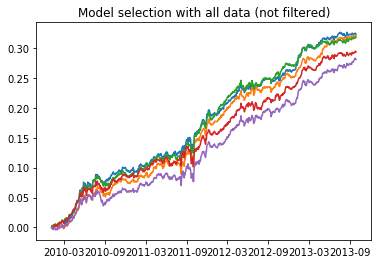

In [48]:
plt.figure()
plt.plot(rets.cumsum())
plt.title('Model selection with all data (not filtered)')
plt.show()

In [52]:
rets2 = rollup_returns(rets)
rets2['total'] = rets2.iloc[:, :4].sum(axis=1)
rets2

Qtr,1,2,3,4,total
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.016480,0.050715,0.021086,0.007957,0.096238
2011,0.016929,0.008088,0.004384,0.064574,0.093975
2012,0.027641,0.014328,0.012927,0.019268,0.074164
2013,0.035933,0.017158,0.005834,NaN,0.058925


In [28]:
# These runs are not correctly labelled
run1 = RunManagerGCP('LongPeadStrategy', 'run_0092', test_periods=2, start_year=2007)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0093', test_periods=7, start_year=2007)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0094', test_periods=7, start_year=2007)
comb = CombinationSearch()

comb.add_run(run1)
comb.add_run(run2)
comb.add_run(run3)

comb.start(10, criteria='sharpe')

100%|██████████| 10/10 [01:47<00:00, 10.72s/it]


In [29]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0097', test_periods=2, start_year=2007)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0098', test_periods=7, start_year=2007)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0099', test_periods=7, start_year=2007)

comb2 = CombinationSearch()

comb2.add_run(run1)
comb2.add_run(run2)
comb2.add_run(run3)

comb2.start(10, criteria='sharpe')

100%|██████████| 10/10 [03:19<00:00, 21.91s/it]


In [36]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0100', test_periods=7, start_year=2007)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0101', test_periods=7, start_year=2007)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0102', test_periods=7, start_year=2007)

comb3 = CombinationSearch()

comb3.add_run(run1)
comb3.add_run(run2)
comb3.add_run(run3)

comb3.start(10, criteria='sharpe')

100%|██████████| 10/10 [01:44<00:00, 10.44s/it]


In [37]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0103', test_periods=7, start_year=2007)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0104', test_periods=7, start_year=2007)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0105', test_periods=7, start_year=2007)

comb4 = CombinationSearch()

comb4.add_run(run1)
comb4.add_run(run2)
comb4.add_run(run3)

comb4.start(10, criteria='sharpe')

100%|██████████| 10/10 [03:06<00:00, 21.06s/it]


In [38]:
rets = comb.best_results_rets.loc[dt.date(2010, 1, 1):]
rets2 = comb2.best_results_rets.loc[dt.date(2010, 1, 1):]
rets3 = comb3.best_results_rets.loc[dt.date(2010, 1, 1):]
rets4 = comb4.best_results_rets.loc[dt.date(2010, 1, 1):]

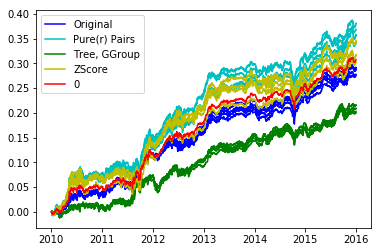

In [42]:
plt.figure()
plt.plot(rets.cumsum(), 'b')
plt.plot(rets.cumsum().iloc[:, 0], 'b', label='Original')
plt.plot(rets2.cumsum(), 'c')
plt.plot(rets2.cumsum().iloc[:, 0], 'c', label='Pure(r) Pairs')

plt.plot(rets3.cumsum(), 'g')
plt.plot(rets3.cumsum().iloc[:, 0], 'g', label='Tree, GGroup')
plt.plot(rets4.cumsum(), 'y')
plt.plot(rets4.cumsum().iloc[:, 0], 'y', label='ZScore')

x = (rets.iloc[:, 0] + rets2.iloc[:, 0] + rets3.iloc[:, 0] + rets4.iloc[:, 0]) / 4
plt.plot(x.cumsum(), 'r')

plt.legend()
plt.show()

In [46]:
rollup_returns(pd.DataFrame(x)).sum(axis=1)

Year
2010    0.049942
2011    0.069081
2012    0.062318
2013    0.055818
2014    0.021024
2015    0.049377
dtype: float64

In [48]:
get_stats(pd.DataFrame(x))

,0
Total,0.3076
Mean,0.0002
Std,0.0017
Skew,0.4343
Kurt,3.6200
Sharpe,1.8685
Sortino,3.4968
MinRet,-0.0096
WinP,0.5384
DD%,-0.0398


In [52]:
stats = ['Total', 'Sharpe', 'DD%']
print(get_stats(rets).loc[stats])
print(get_stats(rets2).loc[stats])

             0       1       2       3       4
Total   0.2881  0.2780  0.2760  0.2915  0.2918
Sharpe  1.7762  1.7071  1.6997  1.8125  1.7779
DD%    -0.0317 -0.0330 -0.0343 -0.0309 -0.0309
             0       1       2       3       4
Total   0.3808  0.3689  0.3413  0.3574  0.3588
Sharpe  1.7918  1.6912  1.5860  1.6720  1.6430
DD%    -0.0555 -0.0619 -0.0537 -0.0587 -0.0531


In [53]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0097', test_periods=2, start_year=2007)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0098', test_periods=7, start_year=2007)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0099', test_periods=7, start_year=2007)

# Combinations on individuals runs
comb3a = CombinationSearch()
comb3b = CombinationSearch()
comb3c = CombinationSearch()

comb3a.add_run(run1)
comb3b.add_run(run2)
comb3c.add_run(run3)

comb3a.start(10, criteria='sharpe')
comb3b.start(10, criteria='sharpe')
comb3c.start(10, criteria='sharpe')

100%|██████████| 10/10 [03:26<00:00, 19.84s/it]


In [54]:
rets3a = comb3a.best_results_rets.loc[dt.date(2010, 1, 1):]
rets3b = comb3b.best_results_rets.loc[dt.date(2010, 1, 1):]
rets3c = comb3c.best_results_rets.loc[dt.date(2010, 1, 1):]

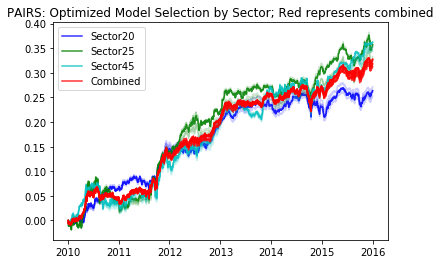

In [55]:
retsF = (rets3a + rets3b + rets3c) / 3.

plt.figure()
plt.plot(rets3a.cumsum(), 'b', alpha=0.2)
plt.plot(rets3a.cumsum().iloc[:, 0], 'b', alpha=0.8, label='Sector20')
plt.plot(rets3b.cumsum(), 'g', alpha=0.2)
plt.plot(rets3b.cumsum().iloc[:, 0], 'g', alpha=0.8, label='Sector25')
plt.plot(rets3c.cumsum(), 'c', alpha=0.2)
plt.plot(rets3c.cumsum().iloc[:, 0], 'c', alpha=0.8, label='Sector45')
plt.plot(retsF.cumsum(), 'r', alpha=0.8)
plt.plot(retsF.cumsum().iloc[:, 0], 'r', alpha=0.8, label='Combined')
plt.legend()
plt.title('PAIRS: Optimized Model Selection by Sector; Red represents combined')
plt.show()

In [56]:
print('Stats for 5 combined strategies')
get_stats(retsF).loc[stats]

Stats for 5 combined strategies


,0,1,2,3,4
Total,0.3276,0.3193,0.3128,0.3173,0.3248
Sharpe,1.7782,1.7224,1.6852,1.7265,1.7588
DD%,-0.0480,-0.0469,-0.0498,-0.0480,-0.0478


In [57]:
rollup_returns(retsF, 0).sum(axis=1)

Year
2010    0.047160
2011    0.087990
2012    0.071089
2013    0.051412
2014    0.013964
2015    0.056008
dtype: float64

In [58]:
# Compare RetsF to combo of other non-pairs runs
#run1b = RunManagerGCP('LongPeadStrategy', 'run_0072', test_periods=7, start_year=2007)
#run2b = RunManagerGCP('LongPeadStrategy', 'run_0073', test_periods=7, start_year=2007)
#run3b = RunManagerGCP('LongPeadStrategy', 'run_0076', test_periods=7, start_year=2007)

run1b = RunManagerGCP('LongPeadStrategy', 'run_0092', test_periods=2, start_year=2007)
run2b = RunManagerGCP('LongPeadStrategy', 'run_0093', test_periods=7, start_year=2007)
run3b = RunManagerGCP('LongPeadStrategy', 'run_0094', test_periods=7, start_year=2007)

# Combinations on individuals runs
comb4a = CombinationSearch()
comb4b = CombinationSearch()
comb4c = CombinationSearch()

comb4a.add_run(run1b)
comb4b.add_run(run2b)
comb4c.add_run(run3b)

comb4a.start(10, criteria='sharpe')
comb4b.start(10, criteria='sharpe')
comb4c.start(10, criteria='sharpe')

100%|██████████| 10/10 [02:50<00:00, 18.05s/it]


In [59]:
rets4a = comb4a.best_results_rets.loc[dt.date(2010, 1, 1):]
rets4b = comb4b.best_results_rets.loc[dt.date(2010, 1, 1):]
rets4c = comb4c.best_results_rets.loc[dt.date(2010, 1, 1):]

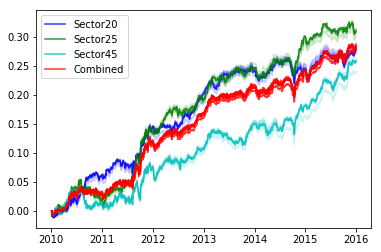

In [60]:
rets4F = (rets4a + rets4b + rets4c) / 3.

plt.figure()
plt.plot(rets4a.cumsum(), 'b', alpha=0.2)
plt.plot(rets4a.cumsum().iloc[:, 0], 'b', alpha=0.8, label='Sector20')
plt.plot(rets4b.cumsum(), 'g', alpha=0.2)
plt.plot(rets4b.cumsum().iloc[:, 0], 'g', alpha=0.8, label='Sector25')
plt.plot(rets4c.cumsum(), 'c', alpha=0.2)
plt.plot(rets4c.cumsum().iloc[:, 0], 'c', alpha=0.8, label='Sector45')
plt.plot(rets4F.cumsum(), 'r', alpha=0.8)
plt.plot(rets4F.cumsum().iloc[:, 0], 'r', alpha=0.8, label='Combined')
plt.legend()
plt.show()

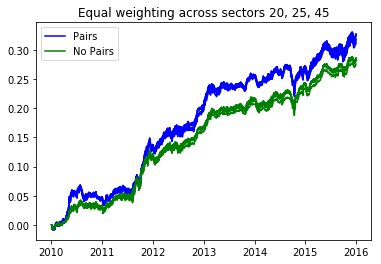

In [61]:
# Compare the two
plt.figure()
plt.plot(retsF.cumsum(), 'b')
plt.plot(retsF.iloc[:, 0].cumsum(), 'b', label='Pairs')
plt.plot(rets4F.cumsum(), 'g')
plt.plot(rets4F.iloc[:, 0].cumsum(), 'g', label='No Pairs')
plt.legend()
plt.title('Equal weighting across sectors 20, 25, 45')
plt.show()

In [42]:
RunManagerGCP.get_run_names('LongPeadStrategy')

,Run,RunDate,Completed,Description
0,run_0025,2017-08-09,True,Version 65
1,run_0031,2017-08-15,True,Market vars and stats
2,run_0034,2017-08-16,True,Constructor2 first run
3,run_0038,2017-08-18,False,Top 800 fixed bug in market data
4,run_0040,2017-08-21,False,Trees have no max features (log2 is in followi...
5,run_0041,2017-08-21,True,Trees have log2 max features
6,run_0046,2017-08-26,False,Abstract alpha
7,run_0050,2017-08-28,False,500 estimators
8,run_0053,2017-08-29,False,Fewer signal hyperparameters to get full run w...
9,run_0065,2017-09-01,False,Extract alpha second run


In [43]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0106', test_periods=7, start_year=2007)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0107', test_periods=7, start_year=2007)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0108', test_periods=7, start_year=2007)

comb4 = CombinationSearch()

comb4.add_run(run1)
comb4.add_run(run2)
comb4.add_run(run3)

comb4.start(10, criteria='sharpe')

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python2.7/dist-packages/ram/analysis/combo_search.py:91: RuntimeWarning: divide by zero encountered in divide
  return np.mean(ports, axis=1) / np.std(ports, axis=1)
100%|██████████| 10/10 [01:36<00:00,  9.84s/it]


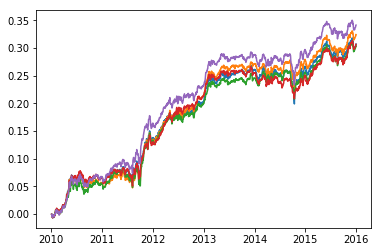

In [49]:
plt.figure()
plt.plot(comb4.best_results_rets.loc[dt.date(2010, 1, 1):].cumsum())
plt.show()

In [44]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0106', test_periods=7, start_year=2007)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0107', test_periods=7, start_year=2007)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0108', test_periods=7, start_year=2007)

comb1 = CombinationSearch()
comb2 = CombinationSearch()
comb3 = CombinationSearch()

comb1.add_run(run1)
comb2.add_run(run2)
comb3.add_run(run3)

comb1.start(2, criteria='sharpe')
comb2.start(2, criteria='sharpe')
comb3.start(2, criteria='sharpe')

100%|██████████| 2/2 [00:17<00:00,  8.15s/it]


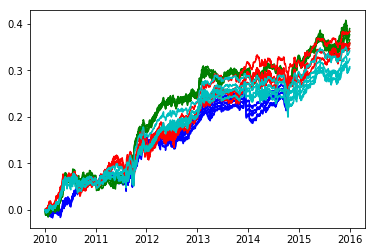

In [50]:
plt.figure()
plt.plot(comb1.best_results_rets.loc[dt.date(2010, 1, 1):].cumsum(), 'b')
plt.plot(comb2.best_results_rets.loc[dt.date(2010, 1, 1):].cumsum(), 'g')
plt.plot(comb3.best_results_rets.loc[dt.date(2010, 1, 1):].cumsum(), 'r')
plt.plot(comb4.best_results_rets.loc[dt.date(2010, 1, 1):].cumsum(), 'c')
plt.show()

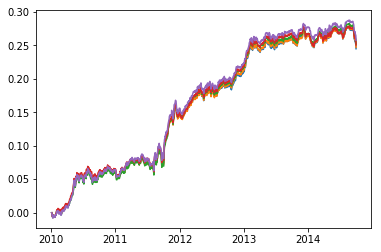

In [52]:
x = (comb1.best_results_rets.loc[dt.date(2010, 1, 1):] + \
comb2.best_results_rets.loc[dt.date(2010, 1, 1):] + \
comb3.best_results_rets.loc[dt.date(2010, 1, 1):] + \
comb4.best_results_rets.loc[dt.date(2010, 1, 1):] ) / 4.

plt.figure()
plt.plot(x.cumsum())
plt.show()

In [61]:
rollup_returns(x).sum(axis=1)

Year
2010    0.062167
2011    0.085389
2012    0.063005
2013    0.053467
2014   -0.019220
2015         NaN
dtype: float64

In [64]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0106', test_periods=7, start_year=2010)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0107', test_periods=7, start_year=2010)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0108', test_periods=7, start_year=2010)

In [65]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,24,0.253882,0.083612
1,drop_extract_alpha,True,24,0.253882,0.083612
2,drop_extremes,True,24,0.253882,0.083612
3,drop_market_variables,constrained,24,0.253882,0.083612
4,drop_starmine,True,24,0.253882,0.083612
5,model_params,"{u'n_estimators': 100, u'max_features': 0.6, u...",24,0.253882,0.083612
6,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",2,0.263598,0.063062
7,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",2,0.273973,0.061098
8,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",2,0.260488,0.085330
9,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",2,0.296213,0.088161


In [66]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,24,0.366055,0.084487
1,drop_extract_alpha,True,24,0.366055,0.084487
2,drop_extremes,True,24,0.366055,0.084487
3,drop_market_variables,constrained,24,0.366055,0.084487
4,drop_starmine,True,24,0.366055,0.084487
5,model_params,"{u'n_estimators': 100, u'max_features': 0.6, u...",24,0.366055,0.084487
6,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",2,0.418198,0.070943
7,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",2,0.461847,0.073564
8,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",2,0.400541,0.088534
9,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",2,0.515402,0.102164


In [67]:
run3.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe
0,drop_accounting,False,24,0.351907,0.078984
1,drop_extract_alpha,True,24,0.351907,0.078984
2,drop_extremes,True,24,0.351907,0.078984
3,drop_market_variables,constrained,24,0.351907,0.078984
4,drop_starmine,True,24,0.351907,0.078984
5,model_params,"{u'n_estimators': 100, u'max_features': 0.6, u...",24,0.351907,0.078984
6,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",2,0.523318,0.089728
7,params,"{u'n_per_side': 1, u'type': u'zscore_model', u...",2,0.551381,0.087644
8,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",2,0.311731,0.071873
9,params,"{u'n_per_side': 3, u'type': u'zscore_model', u...",2,0.296102,0.060094


In [146]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0097', test_periods=2, start_year=2007)
run2 = RunManagerGCP('LongPeadStrategy', 'run_0098', test_periods=7, start_year=2007)
run3 = RunManagerGCP('LongPeadStrategy', 'run_0099', test_periods=7, start_year=2007)

comb2 = CombinationSearch()

comb2.add_run(run1)
comb2.add_run(run2)
comb2.add_run(run3)

comb2.start(10, criteria='sharpe')

100%|██████████| 10/10 [01:34<00:00,  9.70s/it]


In [147]:
run1 = RunManagerGCP('LongPeadStrategy', 'run_0050', test_periods=7, start_year=2007)

comb1 = CombinationSearch()

comb1.add_run(run1)

comb1.start(10, criteria='sharpe')

100%|██████████| 10/10 [02:22<00:00, 16.39s/it]


In [149]:
x = (comb1.best_results_rets.iloc[:, 0] + comb2.best_results_rets.iloc[:, 0])/2.

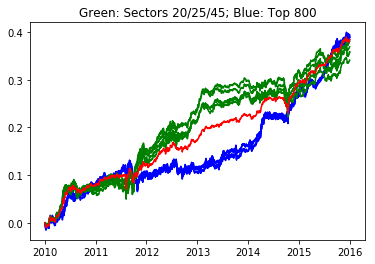

In [150]:
plt.figure()
plt.plot(comb1.best_results_rets.loc[dt.date(2010, 1, 1):].cumsum(), 'b')
plt.plot(comb2.best_results_rets.loc[dt.date(2010, 1, 1):].cumsum(), 'g')
plt.plot(x.loc[dt.date(2010, 1, 1):].cumsum(), 'r')
plt.title('Green: Sectors 20/25/45; Blue: Top 800')
plt.show()

In [156]:
get_stats(x.dropna().to_frame())

,0
Total,0.7897
Mean,0.0004
Std,0.0029
Skew,1.4060
Kurt,15.5800
Sharpe,2.1821
Sortino,4.1870
MinRet,-0.0190
WinP,0.5563
DD%,-0.0336


In [153]:
rollup_returns(x.to_frame()).sum(axis=1)

Year
2007         NaN
2008    0.272822
2009    0.132326
2010    0.079256
2011    0.043165
2012    0.051044
2013    0.051709
2014    0.068084
2015    0.091272
dtype: float64